# Flask Healthcare Application

## Data Processing
---

### Import required libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### Load the CSV data

In [21]:
# File paths
output_dir = Path('../data')
file_name = 'survey_data.csv'
data_path = output_dir / file_name

# Try loading the data
try:
    df = pd.read_csv(data_path)
    # Display the first 5 values
    print("✅ Data imported successfully. Here's a preview:\n")
    #print('Data imported successfully. Here\'s the first few values:\n')
    display( df.head(15) )

except FileNotFoundError:
    print(f"❌ File not found: {data_path}")
except pd.errors.EmptyDataError:
    print("❌ File is empty.")
except pd.errors.ParserError:
    print("❌ File could not be parsed.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")

✅ Data imported successfully. Here's a preview:



,age,gender,total_income,utilities,entertainment,school_fees,shopping,healthcare
0,40,Male,62000.0,20000.0,5000.0,15000.0,11000.0,10000.0
1,55,Female,70000.0,12000.0,6000.0,20000.0,10000.0,11000.0
2,28,Female,85000.0,12000.0,5000.0,20000.0,8000.0,10000.0
3,35,Male,150000.0,20000.0,10000.0,30000.0,15000.0,12000.0
4,42,Female,95000.0,15000.0,7000.0,10000.0,12000.0,15000.0
5,30,Male,60000.0,8000.0,3000.0,5000.0,5000.0,6000.0
6,24,Female,45000.0,4000.0,2500.0,0.0,4000.0,3500.0
7,50,Male,120000.0,18000.0,8000.0,0.0,10000.0,20000.0
8,27,Female,70000.0,10000.0,4000.0,7000.0,9000.0,8000.0
9,39,Male,98000.0,14000.0,5000.0,0.0,10000.0,12000.0


### Inspect the data

**Dataset overview**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            12 non-null     int64  
 1   gender         12 non-null     object 
 2   total_income   12 non-null     float64
 3   utilities      12 non-null     float64
 4   entertainment  12 non-null     float64
 5   school_fees    12 non-null     float64
 6   shopping       12 non-null     float64
 7   healthcare     12 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 900.0+ bytes


**Describing the data**

In [23]:
df.describe()

,age,total_income,utilities,entertainment,school_fees,shopping,healthcare
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,37.166667,86750.000000,13416.666667,5708.333333,10250.000000,9583.333333,11041.666667
std,9.693797,29530.030939,4888.917585,2115.509108,9411.066986,2998.737108,4350.853278
min,24.000000,45000.000000,4000.000000,2500.000000,0.000000,4000.000000,3500.000000
25%,29.500000,68000.000000,10750.000000,4750.000000,3750.000000,8750.000000,9500.000000
50%,37.000000,80500.000000,13000.000000,5500.000000,8500.000000,10000.000000,10500.000000
75%,42.750000,101000.000000,17250.000000,7000.000000,16250.000000,11250.000000,12750.000000
max,55.000000,150000.000000,20000.000000,10000.000000,30000.000000,15000.000000,20000.000000


## Data Visualization
---

### Show the ages with the highest income

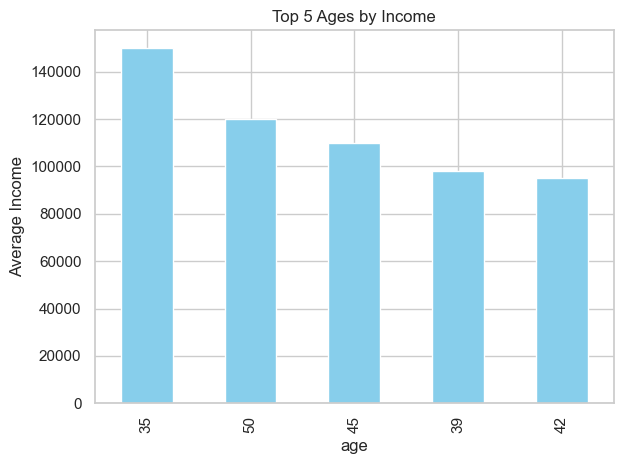

📊 Chart saved to '..\data\charts\top_ages_income.png'


In [24]:
sns.set(style="whitegrid")
# Top Age Groups by Income
try:
    sub_dir = 'charts'
    chart1_name = 'top_ages_income.png'
    
    chart_dir = output_dir / sub_dir
    chart_dir.mkdir(parents=True, exist_ok=True)    
    chart1_path = chart_dir / chart1_name
    
    top_ages = df.groupby('age')['total_income'].mean().sort_values(ascending=False).head(5)
    
    top_ages.plot(kind='bar', title='Top 5 Ages by Income', color='skyblue')
    plt.ylabel("Average Income")
    plt.tight_layout()
    plt.savefig(chart1_path)
    plt.show()
    print(f"📊 Chart saved to '{chart1_path}'")

except Exception as e:
        print(f"⚠️ Failed to generate Top Ages by Income chart: {e}")

### Show the gender distribution across spending categories.

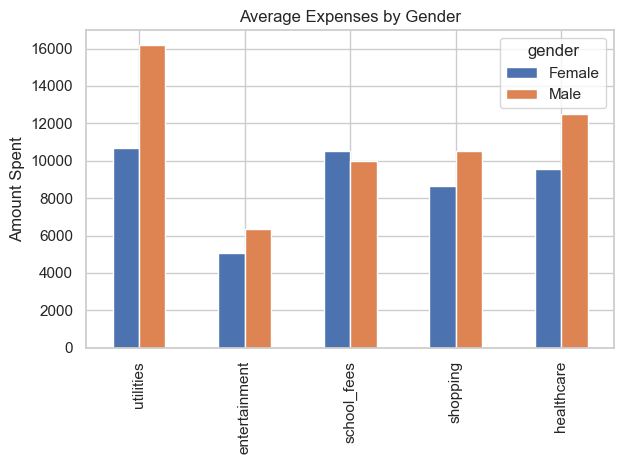

📊 Chart saved to '..\data\charts\gender_distribution.png'


In [25]:
try:
    chart2_name = 'gender_distribution.png'
    chart2_path = chart_dir / chart2_name
    
    expense_categories = ['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']
    gender_distribution = df.groupby('gender')[expense_categories].mean().T
    
    gender_distribution.plot(kind='bar', title='Average Expenses by Gender')
    plt.ylabel("Amount Spent")
    plt.tight_layout()
    plt.savefig(chart2_path)
    plt.show()
    print(f"📊 Chart saved to '{chart2_path}'")
    
except Exception as e:
    print(f"⚠️ Failed to generate Gender Expenses chart: {e}")